In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from os.path import exists
from quality_match.types import TaskInput, TaskOutput, Answer


REFERENCES_DATA_PATH = '../data/references.json'
(ANONYMIZED_PROJECT_DATA_PATH) = '../data/anonymized_project.json'    

def get_answer_disagree_score(task_output: TaskOutput) -> int:  
    ans_map = {Answer.NO: -1, Answer.YES: 1, Answer.EMPTY: 0}
    return ans_map[task_output.answer]

def get_reference_key(task_input: TaskInput) -> str:
    return task_input.image_url.split("/")[-1].split(".")[0]

def load_normalized_data():
    if not exists(REFERENCES_DATA_PATH) or not exists(ANONYMIZED_PROJECT_DATA_PATH):
        raise Exception("Data files not found ...")
    
    references = pd.read_json(REFERENCES_DATA_PATH).T
    anonymized_project_json_file = json.load(open(ANONYMIZED_PROJECT_DATA_PATH))
    anonymized_project_data = anonymized_project_json_file['results']['root_node']['results']

    records = []
    for task_id, tasks in anonymized_project_data.items():
        for record in tasks['results']:
            record['task_id'] = task_id
            record['answer_disagree_score'] = get_answer_disagree_score(TaskOutput.from_dict(record['task_output']))
            ref_key = get_reference_key(TaskInput.from_dict(record['task_input']))        
            record['reference'] = references.loc[ref_key, 'is_bicycle']
            records.append(record)        
       
    data = pd.json_normalize(records)
    
    data.loc[data['task_output.duration_ms'] < 0, "task_output.duration_ms"] = 0 
    data.astype({'task_output.duration_ms': 'int64'}) 

    return data, references

data, references = load_normalized_data()
data 

,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,project_root_node_input_id,task_id,answer_disagree_score,reference,task_input.image_url,task_output.answer,task_output.cant_solve,task_output.corrupt_data,task_output.duration_ms,user.vendor_id,user.id,user.vendor_user_id,root_input.image_url
0,2021-02-25T14:08:11.319438+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0000439a-96ac-4bd4-8753-a4baa229ecf2,7e8984b6-dff7-4015-865a-b721a2faf681,7e8984b6-dff7-4015-865a-b721a2faf681,-1,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,997,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...
1,2021-02-25T13:14:39.411149+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,0488b469-7c5f-459a-bfcb-ed94957c09c2,7e8984b6-dff7-4015-865a-b721a2faf681,7e8984b6-dff7-4015-865a-b721a2faf681,-1,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,845,vendor_01,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,https://qm-auto-annotator.s3.eu-central-1.amaz...
2,2021-02-25T15:19:57.889434+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,323902a9-3b41-4885-8796-4e393aa2e0a0,7e8984b6-dff7-4015-865a-b721a2faf681,7e8984b6-dff7-4015-865a-b721a2faf681,-1,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,1468,vendor_01,780c974e-6ce7-4f1d-9afe-56bf96753fca,annotator_22,https://qm-auto-annotator.s3.eu-central-1.amaz...
3,2021-02-26T03:56:18.770331+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,4222ac20-7aaa-4b07-bb2b-4423bf41eefe,7e8984b6-dff7-4015-865a-b721a2faf681,7e8984b6-dff7-4015-865a-b721a2faf681,-1,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,1062,vendor_01,94afdf79-917c-4904-bdaa-7a121f33b0ff,annotator_17,https://qm-auto-annotator.s3.eu-central-1.amaz...
4,2021-02-25T15:39:06.644705+00:00,5,0.0,7e8984b6-dff7-4015-865a-b721a2faf681,42ba767f-5bd1-4e62-aff1-4e716fd23623,7e8984b6-dff7-4015-865a-b721a2faf681,7e8984b6-dff7-4015-865a-b721a2faf681,-1,False,https://qm-auto-annotator.s3.eu-central-1.amaz...,no,False,False,879,vendor_01,37a6036c-a9ef-4fcb-b554-7058f00415db,annotator_02,https://qm-auto-annotator.s3.eu-central-1.amaz...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90865,2021-02-25T14:50:17.777598+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,c15c69ca-fd11-49b2-b198-d998ed1d6909,3db139c1-7fec-44b3-b770-a790bfcff241,3db139c1-7fec-44b3-b770-a790bfcff241,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,2690,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...
90866,2021-02-26T04:11:29.015906+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,e7674678-572c-4fbb-b0dd-7e43bbc6cfad,3db139c1-7fec-44b3-b770-a790bfcff241,3db139c1-7fec-44b3-b770-a790bfcff241,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1407,vendor_01,66d63556-1235-4a5e-accc-651cb2993db4,annotator_16,https://qm-auto-annotator.s3.eu-central-1.amaz...
90867,2021-02-25T13:58:18.253317+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,ee448bd3-a93e-4586-a5a7-e3722b052d9a,3db139c1-7fec-44b3-b770-a790bfcff241,3db139c1-7fec-44b3-b770-a790bfcff241,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1293,vendor_01,08af8775-a72c-4c59-b60f-9ce7df04fa92,annotator_12,https://qm-auto-annotator.s3.eu-central-1.amaz...
90868,2021-02-25T13:02:51.311501+00:00,5,0.0,3db139c1-7fec-44b3-b770-a790bfcff241,f2859473-b7a0-4c55-b5d9-ee80fa4a75a9,3db139c1-7fec-44b3-b770-a790bfcff241,3db139c1-7fec-44b3-b770-a790bfcff241,1,True,https://qm-auto-annotator.s3.eu-central-1.amaz...,yes,False,False,1306,vendor_01,9fddf227-6680-42f5-aca5-533fc439c193,annotator_04,https://qm-auto-annotator.s3.eu-central-1.amaz...


### Task 1
a. How many annotators did contribute to the dataset?

In [28]:
len(data['user.id'].unique())

22

b. What are the average, min and max annotation times (durations) ? 
Feel free to add visual representations here such as graphs if you like.

In [29]:
data['task_output.duration_ms'].describe().apply("{0:.2f}".format)

count    90870.00
mean      1289.84
std       1124.01
min          0.00
25%        887.00
50%       1058.00
75%       1328.00
max      42398.00
Name: task_output.duration_ms, dtype: object

In [30]:
d = {'Value Count': 90870, 'Mean': 1289.836184, 'Std': 1124.011302, 'Min': 0.0, '25%': 887.0, '50%': 1058.0, '75%': 1328.0, 'Max': 42398.0}
s = pd.Series(d)

duration_plot = s.to_frame('data').boxplot(vert=False, figsize=(10,6),meanline=True, showmeans=True)
plt.title("Summary")

Text(0.5, 1.0, 'Summary')

c. Did all annotators produce the same amount of results, or are there differences? 

In [31]:
data.groupby("user.id").agg(count=('user.id', 'count')).sort_values('count', ascending=False).reset_index()

,user.id,count
0,37a6036c-a9ef-4fcb-b554-7058f00415db,7596
1,fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,7078
2,da2b934c-6384-44ea-adcd-3de648bfae89,6537
3,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,6436
4,9fddf227-6680-42f5-aca5-533fc439c193,6421
5,08af8775-a72c-4c59-b60f-9ce7df04fa92,6210
6,0e606b41-ebe4-4d7d-996c-db910c84971a,6126
7,75f1e1c8-d127-430f-a885-c2d126364198,6088
8,5765cc32-9e32-43e1-bd78-384cfd52d55a,5337
9,32971d11-e972-4d73-99a6-0847e1261995,5170


d. Are there questions for which annotators highly disagree?

In [32]:
d1 = data.groupby("task_input.image_url").agg(sum=('answer_disagree_score', 'sum')).reset_index()
d1[d1['sum'] == 0]['task_input.image_url'].reset_index()
# data[data['task_input.image_url'].isin(d2)].reset_index()

,index,task_input.image_url
0,391,https://qm-auto-annotator.s3.eu-central-1.amaz...
1,490,https://qm-auto-annotator.s3.eu-central-1.amaz...
2,627,https://qm-auto-annotator.s3.eu-central-1.amaz...
3,666,https://qm-auto-annotator.s3.eu-central-1.amaz...
4,669,https://qm-auto-annotator.s3.eu-central-1.amaz...
...,...,...
63,7701,https://qm-auto-annotator.s3.eu-central-1.amaz...
64,8397,https://qm-auto-annotator.s3.eu-central-1.amaz...
65,8812,https://qm-auto-annotator.s3.eu-central-1.amaz...
66,8819,https://qm-auto-annotator.s3.eu-central-1.amaz...


### Task 2


a.1. How often does 'corrupt_data'  occur in the project and do you see a trend within the annotators that made use of these options?

In [33]:
c1 = data[data['task_output.corrupt_data'] == True]
c1.groupby("user.id").agg(count=('user.id', 'count')).sort_values('count', ascending=False).reset_index() 

,user.id,count
0,32971d11-e972-4d73-99a6-0847e1261995,2
1,5765cc32-9e32-43e1-bd78-384cfd52d55a,1
2,da2b934c-6384-44ea-adcd-3de648bfae89,1


a.2. How often does 'cant_solve'  occur in the project and do you see a trend within the annotators that made use of these options?

In [34]:
s1 = data[data['task_output.cant_solve'] == True]
s1.groupby("user.id").agg(count=('user.id', 'count')).sort_values('count', ascending=False).reset_index()


,user.id,count
0,780c974e-6ce7-4f1d-9afe-56bf96753fca,4
1,9fddf227-6680-42f5-aca5-533fc439c193,4
2,37a6036c-a9ef-4fcb-b554-7058f00415db,2
3,da2b934c-6384-44ea-adcd-3de648bfae89,2
4,0e606b41-ebe4-4d7d-996c-db910c84971a,1
5,32971d11-e972-4d73-99a6-0847e1261995,1
6,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,1
7,b04e6596-24c3-4e0b-b96a-4a6d78c04b40,1
8,d40ae601-32bf-4b0c-b92c-5bd474e40c18,1


### Task 3

Is the reference set balanced? Please demonstrate via numbers and visualizations.

In [35]:
counts =references['is_bicycle'].value_counts()
counts

True     4586
False    4501
Name: is_bicycle, dtype: int64

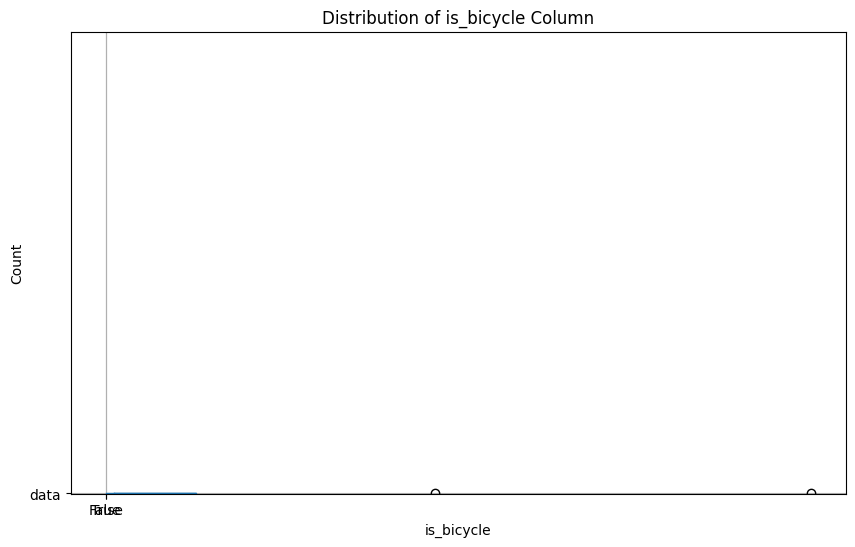

In [36]:
plt.bar(counts.index.astype(str), counts.values)
plt.title('Distribution of is_bicycle Column')
plt.xlabel('is_bicycle')
plt.ylabel('Count')
plt.show()

### Task 4

Using the reference set, can you identify good and bad annotators? Please use statistics and visualizations. Feel free to get creative.

to identify the good/bad annotator we can consider the following approach:
1. Calculate the accuracy of each annotator for both good and bad datasets.
2. Determine a threshold for what constitutes a good annotator versus a bad annotator.
3. Use the threshold to classify each annotator as either good or bad.
4. Validate the classification.

In [37]:
def check_answer(rec):
    if rec['task_output.answer']:
        if rec['task_output.answer'] == 'yes' and rec['reference'] is True:
            return True
        if rec['task_output.answer'] == 'no' and rec['reference'] is False:
            return True
    return False


bad_annotations = data[data.apply(lambda rec: not check_answer(rec) , axis=1)].groupby('user.id').agg(count=('user.id', 'count')).sort_values('count', ascending=False).reset_index()
good_annotations = data[data.apply(lambda rec: check_answer(rec) , axis=1)].groupby('user.id').agg(count=('user.id', 'count')).sort_values('count', ascending=False).reset_index()

users = data.groupby('user.id').agg(count=('user.id', 'count')).sort_values('count', ascending=False).reset_index()

users['bad_annotation_count'] = bad_annotations['count']
users['good_annotation_count'] = good_annotations['count']
users['accuracy_rate'] = (users['good_annotation_count'] / users['count'])
users['error_rate'] = (users['bad_annotation_count']/ users['count']) 
sorted_accuracy = users.sort_values("accuracy_rate", ascending=False)
sorted_accuracy


,user.id,count,bad_annotation_count,good_annotation_count,accuracy_rate,error_rate
18,44629999-ab8a-4871-b4d3-4f92c3058161,1280,66,1214,0.948438,0.051562
7,75f1e1c8-d127-430f-a885-c2d126364198,6088,329,5774,0.948423,0.054041
21,b44e310d-7985-41a0-b764-034b711c75ca,170,9,161,0.947059,0.052941
1,fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,7078,495,6702,0.946878,0.069935
17,b04e6596-24c3-4e0b-b96a-4a6d78c04b40,1725,92,1633,0.946667,0.053333
6,0e606b41-ebe4-4d7d-996c-db910c84971a,6126,376,5774,0.942540,0.061378
10,66d63556-1235-4a5e-accc-651cb2993db4,5061,314,4769,0.942304,0.062043
16,780c974e-6ce7-4f1d-9afe-56bf96753fca,1745,101,1644,0.942120,0.057880
12,94afdf79-917c-4904-bdaa-7a121f33b0ff,3485,219,3283,0.942037,0.062841
14,70b9b917-b4f2-4ed1-b8f9-f3492f980103,2950,185,2773,0.940000,0.062712


Defining the threshold depends on the specific requirements of the project and the nature of the data.
set the threshold at 0.9 in order to ensure that  annotators are at least 90% accurate.

In [38]:
threshold = 0.9
users["annotation_quality"]= "unknown"
users.loc[users['good_annotation_count'] / users['count'] >= threshold, 'annotation_quality'] = 'good'
users.loc[users['bad_annotation_count'] / users['count'] >= 1 - threshold, 'annotation_quality'] = 'bad'
users

,user.id,count,bad_annotation_count,good_annotation_count,accuracy_rate,error_rate,annotation_quality
0,37a6036c-a9ef-4fcb-b554-7058f00415db,7596,659,7101,0.934834,0.086756,good
1,fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,7078,495,6702,0.946878,0.069935,good
2,da2b934c-6384-44ea-adcd-3de648bfae89,6537,461,6026,0.921830,0.070522,good
3,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,6436,436,5960,0.926041,0.067744,good
4,9fddf227-6680-42f5-aca5-533fc439c193,6421,410,5878,0.915434,0.063853,good
5,08af8775-a72c-4c59-b60f-9ce7df04fa92,6210,392,5809,0.935427,0.063124,good
6,0e606b41-ebe4-4d7d-996c-db910c84971a,6126,376,5774,0.942540,0.061378,good
7,75f1e1c8-d127-430f-a885-c2d126364198,6088,329,5774,0.948423,0.054041,good
8,5765cc32-9e32-43e1-bd78-384cfd52d55a,5337,324,4945,0.926550,0.060708,good
9,32971d11-e972-4d73-99a6-0847e1261995,5170,317,4841,0.936364,0.061315,good


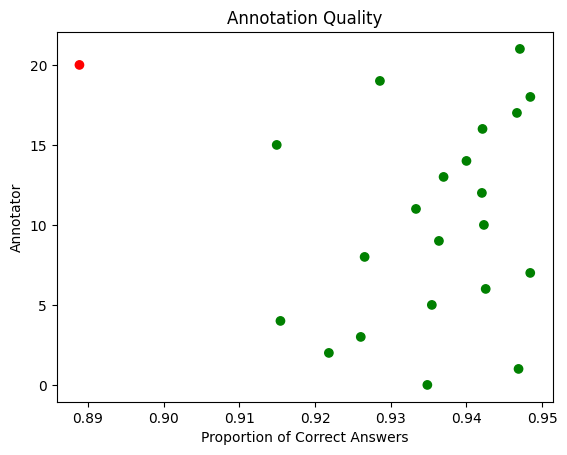

In [39]:
colors = {'good': 'green', 'bad': 'red'}

plt.scatter(users['good_annotation_count'] / users['count'], users.index, c=users['annotation_quality'].apply(lambda x: colors[x]))
plt.title('Annotation Quality')
plt.xlabel('Proportion of Correct Answers')
plt.ylabel('Annotator')
plt.show()